# PictoBERT: Transformers for Pictogram Prediction (Eng-UK semCHILDES creation)

This notebook presents the scripts and procedures for creating the UK part of SemCHILDES as described in section 4.1.1 of the paper. 

We use the created dataset for fine-tuning PictoBERT for predicting pictograms using a pre-defined structure based on the Colourful Semantics structures.

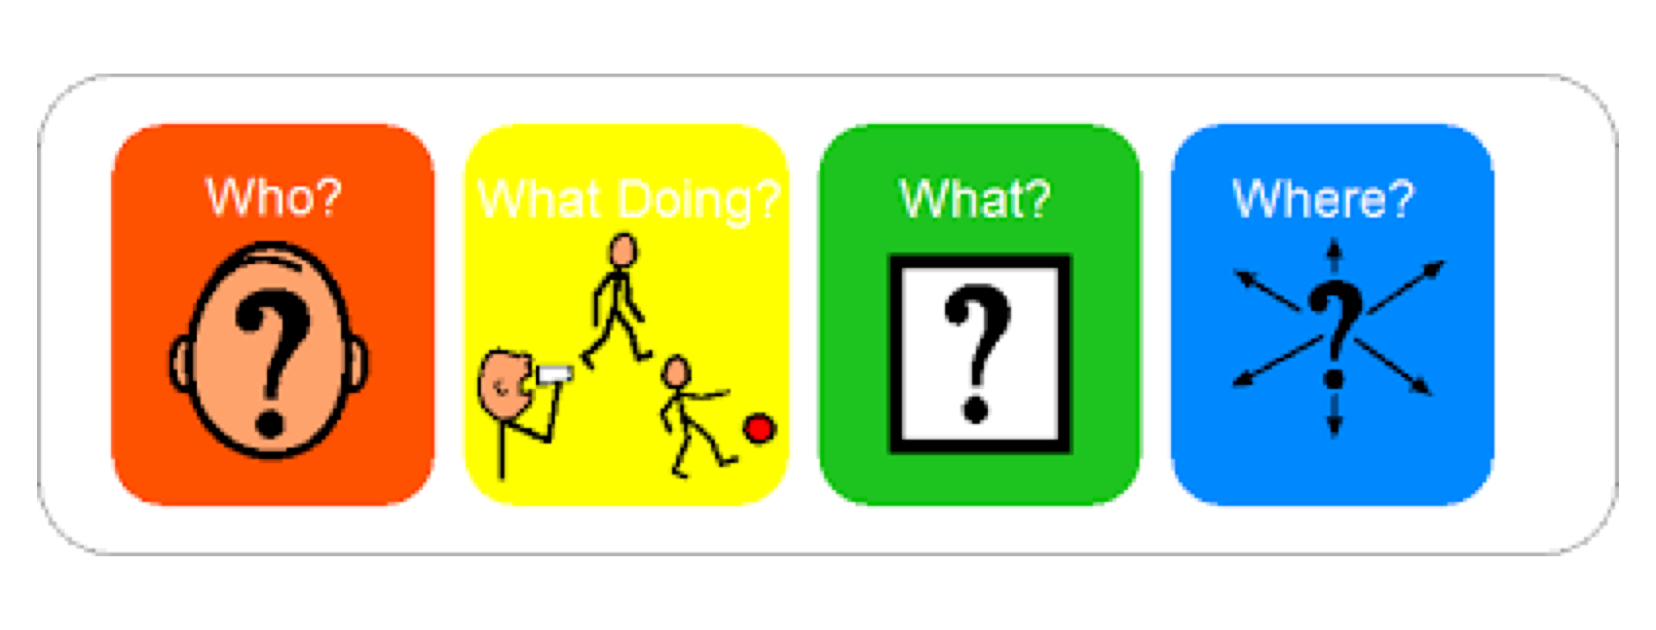

The procedures included using Word-sense disambiguation and semantic role labeling. We describe all the steps below.



## Install Dependencies

In [ ]:
!pip install git+https://github.com/rodriguesfas/PySupWSDPocket.git

  Cloning https://github.com/rodriguesfas/PySupWSDPocket.git to /tmp/pip-req-build-swwohfsh
  Running command git clone -q https://github.com/rodriguesfas/PySupWSDPocket.git /tmp/pip-req-build-swwohfsh


In [ ]:
!pip install http://www.jbox.dk/sling/sling-3.0.0-py3-none-linux_x86_64.whl

     |████████████████████████████████| 6.0 MB 488 kB/s 


## Download data

### Download SupWSD model

In [ ]:
!mkdir pysupwsdpocket_models
!wget -P pysupwsdpocket_models http://jayr.clubedosgeeks.com.br/pictobert/en.zip

--2022-03-23 17:49:31--  http://jayr.clubedosgeeks.com.br/pictobert/en.zip
Resolving jayr.clubedosgeeks.com.br (jayr.clubedosgeeks.com.br)... 192.185.214.132
Connecting to jayr.clubedosgeeks.com.br (jayr.clubedosgeeks.com.br)|192.185.214.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1797035229 (1.7G) [application/zip]
Saving to: ‘pysupwsdpocket_models/en.zip’

en.zip              100%[===================>]   1.67G  13.8MB/s    in 2m 1s   

2022-03-23 17:51:33 (14.1 MB/s) - ‘pysupwsdpocket_models/en.zip’ saved [1797035229/1797035229]



### Download CHILDES Eng-UK corpora

We download all the Eng-UK corpora from [https://childes.talkbank.org/data-xml/Eng-UK/](https://childes.talkbank.org/data-xml/Eng-UK/)

In [ ]:
!mkdir corpora
corpora_files = ["Belfast.zip","Edinburgh.zip","Fletcher.zip","Forrester.zip","Gathburn.zip","Howe.zip","KellyQuigley.zip","Korman.zip","Lara.zip","MPI-EVA-Manchester.zip","Manchester.zip","Nuffield.zip","OdiaMAIN.zip","Sekali.zip","Thomas.zip","Tommerdahl.zip","Wells.zip"]
for corpus_file in corpora_files:
    !wget https://childes.talkbank.org/data-xml/Eng-UK/$corpus_file -O corpora/$corpus_file

mkdir: cannot create directory ‘corpora’: File exists
--2022-03-23 17:43:40--  https://childes.talkbank.org/data-xml/Eng-UK/Belfast.zip
Resolving childes.talkbank.org (childes.talkbank.org)... 128.2.24.68
Connecting to childes.talkbank.org (childes.talkbank.org)|128.2.24.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6124785 (5.8M) [application/zip]
Saving to: ‘corpora/Belfast.zip’

corpora/Belfast.zip 100%[===================>]   5.84M  3.79MB/s    in 1.5s    

2022-03-23 17:43:43 (3.79 MB/s) - ‘corpora/Belfast.zip’ saved [6124785/6124785]

--2022-03-23 17:43:43--  https://childes.talkbank.org/data-xml/Eng-UK/Edinburgh.zip
Resolving childes.talkbank.org (childes.talkbank.org)... 128.2.24.68
Connecting to childes.talkbank.org (childes.talkbank.org)|128.2.24.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2581690 (2.5M) [application/zip]
Saving to: ‘corpora/Edinburgh.zip’

corpora/Edinburgh.z 100%[===================>]   2.46M  

In [ ]:
for corpus_file in corpora_files:
    !unzip corpora/$corpus_file -d corpora

Archive:  corpora/Belfast.zip
replace corpora/Belfast/Barbara/020912.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  corpora/Edinburgh.zip
replace corpora/Edinburgh/john0903.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  corpora/Fletcher.zip
replace corpora/Fletcher/5/hnclak.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  corpora/Forrester.zip
replace corpora/Forrester/030228.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  corpora/Gathburn.zip
replace corpora/Gathburn/41.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  corpora/Howe.zip
replace corpora/Howe/kevin1.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Download VerbAtlas propbank mappings file

As described in the paper, we used InVeRo for predicate disambiguation to identify the sentence’s predicates and its relative semantic frames.

You can visit [https://verbatlas.org/download](https://verbatlas.org/download) and download all the files. In this notebook, we download only the one we use.

In [ ]:
!wget http://jayr.clubedosgeeks.com.br/pictobert/pb2va.json

--2022-03-23 18:23:13--  http://jayr.clubedosgeeks.com.br/pictobert/pb2va.json
Resolving jayr.clubedosgeeks.com.br (jayr.clubedosgeeks.com.br)... 192.185.214.132
Connecting to jayr.clubedosgeeks.com.br (jayr.clubedosgeeks.com.br)|192.185.214.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464422 (454K) [application/json]
Saving to: ‘pb2va.json’

pb2va.json          100%[===================>] 453.54K   468KB/s    in 1.0s    

2022-03-23 18:23:15 (468 KB/s) - ‘pb2va.json’ saved [464422/464422]



### Download SLING model

As described in the paper, we used SLING for identifying
and labeling the predicate-argument structure for each frame.

In [ ]:
!wget http://jayr.clubedosgeeks.com.br/pictobert/caspar.flow

--2022-03-23 18:19:21--  http://jayr.clubedosgeeks.com.br/pictobert/caspar.flow
Resolving jayr.clubedosgeeks.com.br (jayr.clubedosgeeks.com.br)... 192.185.214.132
Connecting to jayr.clubedosgeeks.com.br (jayr.clubedosgeeks.com.br)|192.185.214.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9212285 (8.8M)
Saving to: ‘caspar.flow’

caspar.flow         100%[===================>]   8.79M  4.48MB/s    in 2.0s    

2022-03-23 18:19:24 (4.48 MB/s) - ‘caspar.flow’ saved [9212285/9212285]



## Data extraction

The data extraction consists on extracting all sentences from the Eng-UK part of CHILDES database.

In [ ]:
import os
from glob import glob
PATH = "./corpora"
all_files = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], '*.xml'))]
print(len(all_files))
print(all_files[0])

In [ ]:
def find_participants(root):
    participants = []
    for participant in root.find(ns+"Participants"):
      participants.append(participant.attrib)
    return participants

In [ ]:
def parse_utterance(u):
    wsd_doc = []
    if 'text' in u:
        doc = nlp.wsd(u['text'])
        for token in doc.tokens():
          wsd_doc.append(token.__dict__)
    return wsd_doc

In [ ]:
from tqdm import tqdm
def process_utterances(root, process_faster=False):
    utterances = []
    for u in root.findall(ns+'u'):
      utterance_dict = u.attrib
      utterance_dict['original_tokens'] = []
      tokens = []
      for token in u.getchildren():
        if token.tag == ns+"w":
          tags = [a.tag for a in token.getchildren()]
          if ns+"shortening" in tags:
            try:
                tokens.append(token.find(ns+'mor').find(ns+"mw").find(ns+"stem").text)
            except:
                pass
          elif token.text is not None:
            tokens.append(token.text)
        elif token.tag == ns+"g": # group of words
          token = token.find(ns+'w')
          if token is not None:
              tags = [a.tag for a in token.getchildren()]
              if ns+"shortening" in tags:
                try:
                    tokens.append(token.find(ns+'mor').find(ns+"mw").find(ns+"stem").text)
                except:
                    pass
              elif token.text is not None:
                tokens.append(token.text)

        elif token.tag == ns+"t": # punctuation
          if token.attrib['type'] == 'p':
            tokens.append(".")
          elif token.attrib['type'] == 'q':
            tokens.append("?")
        elif token.tag == ns+"tagMarker": #comma
          tokens.append(',')
      if len(tokens) > 1:
        utterance_dict['text'] = " ".join(tokens)
      if not process_faster:
          utterance_dict['wsd_doc'] = parse_utterance(utterance_dict)
      utterances.append(utterance_dict)

    return utterances

## WSD parsing

This step parses all the extracted sentences to annotate them with word-senses.

In [ ]:
from pysupwsdpocket import PySupWSDPocket
nlp = PySupWSDPocket(lang='en', model='semcor_omsti', model_path="./pysupwsdpocket_models/")    

In [ ]:
!mkdir wsd

In [ ]:
import os, json
from glob import glob
from tqdm import tqdm

faster_processing = True
if faster_processing:
    PATH = "only_texts/"
    only_texts_files = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], '*.txt'))]
    
    for text_file in tqdm(only_texts_files):
      n_name = text_file.split("/")[-1]
      f = open("./wsd/{0}.json".format(n_name),'w')

      corpus = nlp.parse_corpus(text_file)
      docs_json= []
      for doc in corpus:
        docs_json.append(doc._json_object)
      json.dump(docs_json, f)

            

## Create database
We opted to transform the dataset into a relational database to facilitate future queries.

In [2]:
import sqlite3

con = sqlite3.connect("./childes_data.db",isolation_level='DEFERRED')

c = con.cursor()

In [ ]:

c.execute('''PRAGMA synchronous = OFF''')
c.execute('''PRAGMA journal_mode = OFF''')


c.execute('''CREATE TABLE IF NOT EXISTS "collection" (
	"id"	TEXT,
	"name"	TEXT,
	PRIMARY KEY("id")
);''')
c.execute('''CREATE TABLE IF NOT EXISTS "corpus" (
	"id"	INTEGER,
	"name"	TEXT,
	"collection_id"	TEXT,
	PRIMARY KEY("id" AUTOINCREMENT)
);''')
c.execute('''CREATE TABLE IF NOT EXISTS "roles" (
	"id"	TEXT,
	"structure_id"	INTEGER,
	"token_id"	INTEGER,
	"role"	TEXT,
	PRIMARY KEY("id")
);''')
c.execute('''CREATE TABLE IF NOT EXISTS "structures" (
	"id"	TEXT,
	"utterance_id"	INTEGER,
	"predicate_id"	INTEGER,
	"text"	TEXT,
	"num_roles"	INTEGER,
	PRIMARY KEY("id")
);''')
c.execute('''CREATE TABLE IF NOT EXISTS "tokens" (
	"id"	TEXT,
	"gloss"	TEXT,
	"sense_key"	TEXT,
	"token_sequence"	INTEGER,
	"is_predicate"	INTEGER DEFAULT 0,
	"utterance_id"	INTEGER,
	"lemma"	TEXT,
	"pos"	TEXT,
	"tag"	TEXT,
	"dep"	TEXT,
	"head"	INTEGER,
	PRIMARY KEY("id")
);''')
c.execute('''CREATE TABLE IF NOT EXISTS "transcript" (
	"id"	INTEGER,
	"file_path"	TEXT,
	"corpus_id"	INTEGER,
	PRIMARY KEY("id" AUTOINCREMENT)
);''')
c.execute('''CREATE TABLE IF NOT EXISTS "utterance" (
	"id"	TEXT,
	"gloss"	TEXT,
	"speaker_code"	TEXT,
	"speaker_name"	TEXT,
	"corpus_id"	INTEGER,
	"speaker_id"	INTEGER,
	"speaker_role"	INTEGER,
	"speaker_age"	REAL,
	"num_tokens"	INTEGER,
	"num_morphemes"	INTEGER,
	"num_structures"	INTEGER,
	"mlu_m"	REAL,
	"mlu_w"	REAL,
	PRIMARY KEY("id")
);''')
con.commit()


In [19]:
import uuid
def create_utterance(data):
  c = con.cursor()
  utterance_id = str(uuid.uuid1())
  c.execute("INSERT INTO utterance (gloss, num_tokens, num_structures,id) VALUES (?,?,?,?)", data+(utterance_id,))
  return utterance_id

def add_tokens(tokens, utterance_id):
  tokens_data = []
  i = 0
  for token in tokens:
    sense_key = token['senses'][0]['id']
    if sense_key == 'U':
      sense_key = None
    token = token['token']
    token_id = str(uuid.uuid1())
    token_data = (token_id,token['word'],sense_key,i,utterance_id, token['lemma'], token['pos'], token['tag'])
    tokens_data.append(token_data)
    i += 1

  qry = "INSERT INTO tokens (id,gloss, sense_key, token_sequence, utterance_id, lemma, pos, tag) VALUES (?,?,?,?,?,?,?,?)"
  try:
    con.executemany(qry, tokens_data)
    # con.commit()
  except sqlite3.Error as errr:
    print(errr)

def get_token_id(utterance_id, token_sequence):
  c = con.cursor()
  for row in c.execute("SELECT id FROM tokens WHERE utterance_id = ? AND token_sequence = ?", (utterance_id, token_sequence,)).fetchall():
    return row[0]

def add_structures(frames, utterance_id):
  for frame in frames:
    predicate_id = get_token_id(utterance_id,frame['predicate_index'])
    text = frame['structure']
    num_roles = len(frame['roles'])
    structure_id = str(uuid.uuid1())
    c = con.cursor()
    c.execute("INSERT INTO structures (id,utterance_id, predicate_id, text, num_roles) VALUES (?,?,?,?,?)",(structure_id,utterance_id,predicate_id,text,num_roles))
    # structure_id = c.lastrowid
    c.close()
    # con.commit()
    # else:
      # structure_id = ts[0][0]
    add_roles(frame['roles'], structure_id, utterance_id)

def add_roles(roles, structure_id,utterance_id):
  data = []
  for role in roles:
    role_id = str(uuid.uuid1())
    token_id = get_token_id(utterance_id, role['index'])
    data.append((role_id,structure_id,token_id, role['role']))
    
  con.executemany("INSERT INTO roles (id,structure_id,token_id, role) VALUES (?,?,?,?)",data)

## Semantic Role Labeling

At this step, we extract the semantic role relationships from the sentences and insert them into the database.

In [4]:
import sling

commons = sling.Store()

schema = sling.DocumentSchema(commons)
n_name = commons['name']
n_pos = commons['pos']
n_isa = commons['isa']
n_head = commons['sup_token']
n_ud_id = commons['id']
n_lemma = commons['lemma']
synset = commons['synset']
predicate = commons['/pb/predicate']
thing = commons['thing']

parser = sling.Parser("./caspar.flow",commons)

In [5]:
import json
modifiers = {
    "COM": "Comitative",
    "LOC": "Location",
    "DIR": "Direction",
    "GOL": "Goal",
    "MNR": "Manner",
    "TMP": "Time",
    "EXT": "Extent",
    "REC": "Reciprocal",
    "PRD": "SecondPredicate",
    "CAU": "Cause",
    "DIS": "DiscourseMark",
    "MOD": "Modal",
    "NEG": "Negation",
    "DSP": "DirectSpeech",
    "ADV": "Adverb",
    "LVB": "LightVerb",
    "CXN": "Construction",
    "PRP": "Purpose",
    "ADJ": "Adjective"
}
semlink = {
    "A0": "Agent",
    "A1": "Theme"

}

pb_va = json.loads(open("./pb2va.json",'r').read())
def get_mapping(frame_id):
  if frame_id in pb_va:
    return pb_va[frame_id]
  return None


In [6]:
import os
from glob import glob
json_files = only_texts_files = [y for x in os.walk('./wsd') for y in glob(os.path.join(x[0], '*.json'))]

In [20]:
import requests,re
from tqdm import tqdm
for json_file in json_files:
  docs = json.load(open(json_file,'r'))
  sentences = []
  for doc in tqdm(docs):
    text = doc['raw_text']

    sup_tokens = [t['token']['word'] for t in doc['tokens']]
    send_text = " ".join(sup_tokens)

    # print(send_text)

    try:
      r = requests.get("http://verbatlas.org/api/demo?sentence="+send_text)
    except:
      continue
    
    if r.status_code != 200:
      continue

    results = r.json()

    senses = []
    sling_doc = sling.Document(None, commons, schema)
    for token in doc['tokens']:
      sling_doc.add_token(token['token']['word'])
      if (token['senses'][0]['id']) == 'U':
          senses.append(token['token']['lemma'])
      else:    
          senses.append(token['senses'][0]['id'])
    sling_doc.update()
    parser.parse(sling_doc)
    
    for mention in sling_doc.mentions:
      for e in mention.evokes():
        e.name = sling_doc.phrase(mention.begin, mention.end)
        k = senses[mention.begin]
        e.index = mention.begin
        if k is not None:
          e.sense_key = k
        if e.isa("/pb/predicate"):
          for annotation in results['annotations']:
            if annotation['tokenIndex'] == mention.begin:
              e.frame_id = annotation["englishPropbank"]["frameName"]
    
    frames = []
    for mention in sling_doc.mentions:
      for e in mention.evokes():
        if e.isa("/pb/predicate"):
          if e['frame_id'] is not None:
            # print(e)
            mappings = get_mapping(e['frame_id'])
            if mappings is not None:
              frame = {"predicate": e['sense_key'],"roles":[],"predicate_index":e['index']}
              frame_roles = [""] * len(sling_doc.tokens)
              frame_roles[e['index']] = "VERB"
              for el in e:
                parts = str(el[0]).split('/')
                if len(parts) > 1:
                  arg = parts[2][:-1]
                  if arg.startswith('R'):
                    arg = arg[2:]
                  numbers = re.findall('\d+',arg)
                  if len(numbers) == 0:
                    arg = modifiers[arg.split("-")[1]]
                  else:
                    m_arg = 'A'+arg[-1]
                    if m_arg in mappings:
                      arg = mappings[m_arg]
                    elif m_arg in semlink:
                      arg = semlink[m_arg]
                    else:
                      arg = m_arg
                  sense = e[el[0]]['sense_key']
                  if sense is None:
                    sense = e[el[0]]['name']
                  frame['roles'].append({"role":arg,"sense":sense,'index':e[el[0]]['index'],'word':e[el[0]]['name']})
                  frame_roles[e[el[0]]['index']] = arg
              frame['structure'] = " ".join([a for a in frame_roles if a != ""])
              if len(frame['roles']) > 0:
                frames.append(frame)
    # print()
    utterance_id = create_utterance((send_text,len(sup_tokens),len(frames)))
    add_tokens(doc['tokens'],utterance_id)
    add_structures(frames, utterance_id)

100%|██████████| 50/50 [01:12<00:00,  1.44s/it]


In [21]:
def get_token(id):
    c = con.cursor()
    token  = c.execute("SELECT * FROM tokens WHERE id = ?",(id,)).fetchone()
    try:
        if token[2] is None:
            return None
    except:
        return None
    return token[2]

## Transform semantic structures into sequences

At this step, we transform the sentences' semantic role structures into sequences of tokens. These sequences relate to the Colourful Semantics structure (i.e., Who, What Doing, What, Where, To Whom, When, What like).

We write the sequences to a text file, which is used for training the fine-tuned model.

In [22]:
qry_structures = [
    {
        "qry": """SELECT id, predicate_id,text FROM structures where text like '%Agent VERB Theme%'
                or text like '%Agent VERB' or text like '%Agent Modal VERB Theme%' or text like 'VERB Location%'
                or text like '%Agent Negation VERB Theme%' or text like '%Agent % VERB Theme%'
                or text like '%Agent % VERB' or text like '%Theme Agent VERB%' or text like 'VERB Theme %'
                or text in ('Agent VERB','Theme Agent VERB','Agent VERB Direction','DiscourseMark VERB Theme','Agent VERB Location')
                and text not like 'VERB Theme Attribute%' and text not like 'VERB Theme A2%'""",
        "structure": "Agent VERB Theme Location Recipient Manner Time"
    },
    {
        "qry": """SELECT id, predicate_id,text FROM structures where text like '%Theme VERB Attribute%'
                or text like 'Theme VERB%' or text like 'VERB A2%' or text like '%Theme VERB'
                or text like '%Attribute Theme VERB%' and text like 'VERB Theme Attribute%'
                and text not like '%Theme VERB A2%' and text <> 'Agent Theme VERB'"""  ,
        "structure": "Theme VERB Attribute Location Recipient Manner Time"
    },
    {
        "qry": """SELECT id, predicate_id,text FROM structures where text like '%Theme VERB A2%' 
                or text like '%A2 VERB Theme%' or text like 'VERB Theme A2%'""",
        "structure": "Theme VERB A2 Location Recipient Manner Time"
    },
    {
        "qry": """SELECT id, predicate_id,text FROM structures where text like '%Experiencer VERB%'
                or text like 'VERB Stimulus%' or text like 'Experiencer % VERB' or text like 'Experiencer % VERB'
                or text like '%Experiencer % VERB%'
                and text not like '%Experiencer VERB Theme%' and text not like '%Experiencer % VERB Theme%'""",
        "structure": "Experiencer VERB Stimulus Location Recipient Manner Time"
    },
    {
        "qry": """SELECT id, predicate_id,text FROM structures where text like '%Experiencer VERB Theme%'
                or text like '%Experiencer % VERB Theme%'""",
        "structure": "Experiencer VERB Theme Location Recipient Manner Time"
    },
    {
        "qry": """SELECT id, predicate_id,text FROM structures where text like '%Agent VERB Patient%' 
                or text like 'Patient VERB%'""",
        "structure": "Agent VERB Patient Location Recipient Manner Time"
    },
]

In [23]:
replecements = {
    "n't." : "no%1:10:00::",
}
marks = [
        "Agent",
        "Theme",
        "Location",
        "Attribute",
        "Patient",
        "Experiencer",
        "Stimulus",
        "A2",
        "Recipient",
         "Manner",
         "Time"
]

In [24]:
from tqdm import tqdm
f = open("./sem_childes_uk_srl.txt",'w')
cursor = con.cursor()
for item in qry_structures:
  qry = item['qry']
  for id_, predicate_id, text in tqdm(cursor.execute(qry)):
    predicate = get_token(predicate_id)
    if predicate is not None:
        my_text = item['structure']
        x = my_text.replace('VERB',predicate)
        c = con.cursor()
        for sense_key, gloss, role,pos in c.execute("select B.sense_key,B.gloss,A.role,B.tag from roles A inner join tokens B ON A.token_id = B.id where A.structure_id = ?",(id_,)):
            if sense_key is None:
                sense_key = gloss
            if pos == 'NNP':
                sense_key = 'proper_noun'
            if sense_key in replecements.keys():
              sense_key = replecements[sense_key]
            sense_key = sense_key.lower()
            if "'" in sense_key and '%' not in sense_key:
              sense_key = sense_key.replace("'ll","").replace("'d",'').replace("'m",'').replace("'re",'').replace("'s",'').replace("'ve",'')
            
            x  = x.replace(role, sense_key)
        for mk in marks:
            x = x.replace(mk,'[PAD]')
        f.write(x+"\n")
f.close()

20it [00:00, 5260.30it/s]
10it [00:00, 5211.61it/s]
4it [00:00, 5179.75it/s]
2it [00:00, 3679.21it/s]
0it [00:00, ?it/s]
4it [00:00, 5509.76it/s]
